# Import libraries

In [65]:
import pandas as pd
import os
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import matplotlib.pyplot as plt
import streamlit as st
from PIL import Image
# path = input("Please input path of the file: ")
# key = input("Please input a magic key: ")
# filename = input("Please input name of the file: ")

# Input Data

## Input

### Input Data by Month

In [66]:
path = "C:/Users/nguyen.minh.tu/Desktop/PYTHON/Jan2023/"
df = pd.read_csv(path + "Jan_2023_all.csv")
# df = pd.read_csv(path + key + filename)
df.head()

,Week,Campaign name,Zone,Shop id,Item id,Pool deals/Not Pool deals,Live day,End day,Total live days,GMV,...,ADO,CAT Final,Batch,LKAM,KAM,Seller Source,Item Link,Tier,Tier source,Strategic
0,W1 (3.1-8.1),FSD,FSD_10%,616289388,18761533580,Pool deals,4-Jan,4-Jan,1,0.0,...,0.0,FMCG,Batch 28,ducmanh.dao,thaouyen.luuphuong,2. Social TikTok,https://shopee.vn/a-i.616289388.18761533580,Tier 3,Other,2.1. Social Tiktok SST
1,W1 (3.1-8.1),FSD,FSD_10%,735538552,21345715649,Pool deals,4-Jan,4-Jan,1,116000.0,...,1.0,ELHA,Batch 28,ducmanh.dao,thaouyen.luuphuong,2. Social TikTok,https://shopee.vn/a-i.735538552.21345715649,Tier 3,Other,2.1. Social Tiktok SST
2,W1 (3.1-8.1),FSD,FSD_10%,735538552,21059649302,Pool deals,4-Jan,4-Jan,1,0.0,...,0.0,ELHA,Batch 28,ducmanh.dao,thaouyen.luuphuong,2. Social TikTok,https://shopee.vn/a-i.735538552.21059649302,Tier 3,Other,2.1. Social Tiktok SST
3,W1 (3.1-8.1),FSD,FSD_10%,151598291,5563517454,Pool deals,4-Jan,4-Jan,1,0.0,...,0.0,LIFESTYLE,Batch 28,ducmanh.dao,thaouyen.luuphuong,2. Social TikTok,https://shopee.vn/a-i.151598291.5563517454,Tier 3,Other,2.1. Social Tiktok SST
4,W1 (3.1-8.1),FSD,FSD_10%,151598291,11763289070,Pool deals,4-Jan,4-Jan,1,0.0,...,0.0,LIFESTYLE,Batch 28,ducmanh.dao,thaouyen.luuphuong,2. Social TikTok,https://shopee.vn/a-i.151598291.11763289070,Tier 3,Other,2.1. Social Tiktok SST


### Input Campaign Station

In [67]:
path = "C:/Users/nguyen.minh.tu/Desktop/PYTHON/Jan2023/"
df1 = pd.read_csv(path + "Jan_CP Station.csv")
# df = pd.read_csv(path + key + filename)
df1.head()

,Date,Microsite Page Url,Microsite Page ID,Page View,Unique Visitor,Impression,Click,CTR,% of Shopee Visitor,Bounce Rate,Complete Traffic CR,Total Complete Order (ATC),Total Complete GMV (ATC),Total Complete GMV (ATC)_USD,Total Complete Order (Placed),Total Complete GMV (Placed),Total Complete GMV (Placed)_USD
0,1/1/2023,shop-moi-len-san,19497,4,1,16,0,0.00%,0.00%,100.00%,0.00%,0.0,0.0,0.0,0.0,0.0,0.0
1,1/1/2023,shop-moi-len-san-moi-0107,31123,2,2,44,1,2.27%,0.00%,50.00%,0.00%,0.0,0.0,0.0,0.0,0.0,0.0
2,1/1/2023,shop-moi-len-san-moi1-1,39169,19659,14690,625859,41193,6.58%,0.00%,62.28%,1.39%,225.0,10447343.4,443.1,228.5,10617606.1,450.3
3,1/1/2023,shop-moi-len-san-moi1111,37236,9,3,405,14,3.46%,0.00%,33.33%,0.00%,0.0,0.0,0.0,0.0,0.0,0.0
4,1/1/2023,shop-moi-len-san-moi112,37983,1,1,27,0,0.00%,0.00%,100.00%,0.00%,0.0,0.0,0.0,0.0,0.0,0.0


## Precheck data

In [68]:
print(df.apply(lambda col: col.unique()))

Week                         [W1 (3.1-8.1), W2 (9.1-15.1), W3 (16.1-22.1), ...
Campaign name                  [FSD, CBD, DD, UZD, PSD, Tet CP 2023, HTC, CCB]
Zone                         [FSD_10%, FSD_20%, FSD_40%, FSD_50%, CBD_10%, ...
Shop id                      [616289388, 735538552, 151598291, 796612955, 4...
Item id                      [18761533580, 21345715649, 21059649302, 556351...
Pool deals/Not Pool deals         [Pool deals, Not Pool deals, Not Pool Deals]
Live day                     [4-Jan, 6-Jan, 5-Jan, 2-Jan, 11-Jan, 13-Jan, 7...
End day                      [4-Jan, 6-Jan, 5-Jan, 14-Jan, 11-Jan, 13-Jan, ...
Total live days                                                     [1, 13, 7]
GMV                          [0.0, 116000.0, 40000.0, 32876.12102, 580349.0...
Total Order                  [0, 1, 5, 4, 2, 81, 8, 12, 3, 7, 73, 6, 11, 13...
CAT Data Go                  [Beauty, Mobile & Gadgets, Home & Living, Book...
ADO                          [0.0, 1.0, 5.0, 4.0, 2.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124260 entries, 0 to 124259
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Week                       124260 non-null  object 
 1   Campaign name              124260 non-null  object 
 2   Zone                       124260 non-null  object 
 3   Shop id                    124260 non-null  int64  
 4   Item id                    124260 non-null  int64  
 5   Pool deals/Not Pool deals  124260 non-null  object 
 6   Live day                   124260 non-null  object 
 7   End day                    124260 non-null  object 
 8   Total live days            124260 non-null  int64  
 9   GMV                        124260 non-null  float64
 10  Total Order                124260 non-null  int64  
 11  CAT Data Go                124260 non-null  object 
 12  ADO                        124260 non-null  float64
 13  CAT Final                  12

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             375 non-null    object 
 1   Microsite Page Url               375 non-null    object 
 2   Microsite Page ID                375 non-null    int64  
 3   Page View                        375 non-null    int64  
 4   Unique Visitor                   375 non-null    int64  
 5   Impression                       375 non-null    int64  
 6   Click                            375 non-null    int64  
 7   CTR                              375 non-null    object 
 8   % of Shopee Visitor              375 non-null    object 
 9   Bounce Rate                      375 non-null    object 
 10  Complete Traffic CR              375 non-null    object 
 11  Total Complete Order (ATC)       375 non-null    float64
 12  Total Complete GMV (AT

## Number Formatting

In [71]:
#number formatting
def billions(x, pos):
    return '%1.0f B' % (x*1e-9)
formatter_billions = FuncFormatter(billions)

def millions(x, pos):
    return '%1.0f M' % (x*1e-6)
formatter_millions = FuncFormatter(millions)

def thousands(x, pos):
    return '%1.0f K' % (x*1e-3)
formatter_thousands = FuncFormatter(thousands)

# Grouping data

## Group by ADO

In [72]:
ADO_byCP = dict(df.groupby(by="Campaign name")["ADO"].sum().sort_values(ascending=False))

ADO_byLKAM = dict(df.groupby(by="LKAM")["ADO"].sum().sort_values(ascending=False))
ADO_byLKAM_AtoZ = dict(df.groupby(by="LKAM")["ADO"].sum().sort_values(ascending=True))

ADO_byBatch = dict(df.groupby(by="Batch")["ADO"].sum().sort_values(ascending=False))
ADO_byCAT = dict(df.groupby(by="CAT Data Go")["ADO"].sum().sort_values(ascending=False))
ADO_byGCAT = dict(df.groupby(by="CAT Final")["ADO"].sum().sort_values(ascending=False))
ADO_bySource = dict(df.groupby(by="Seller Source")["ADO"].sum().sort_values(ascending=False))
ADO_byTier = dict(df.groupby(by="Tier")["ADO"].sum().sort_values(ascending=False))
ADO_byTiersource = dict(df.groupby(by="Tier source")["ADO"].sum().sort_values(ascending=False))

## Group by GMV

In [73]:
GMV_byCP = dict(df.groupby(by="Campaign name")["GMV"].sum().sort_values(ascending=False))
GMV_byLKAM = dict(df.groupby(by="LKAM")["GMV"].sum().sort_values(ascending=False))
GMV_byBatch = dict(df.groupby(by="Batch")["GMV"].sum().sort_values(ascending=False))
GMV_byCAT = dict(df.groupby(by="CAT Data Go")["GMV"].sum().sort_values(ascending=False))
GMV_byGCAT = dict(df.groupby(by="CAT Final")["GMV"].sum().sort_values(ascending=False))
GMV_bySource = dict(df.groupby(by="Seller Source")["GMV"].sum().sort_values(ascending=False))
GMV_byTier = dict(df.groupby(by="Tier")["GMV"].sum().sort_values(ascending=False))
GMV_byTiersource = dict(df.groupby(by="Tier source")["GMV"].sum().sort_values(ascending=False))

## Group by ADO/slot

In [74]:
ADOperslot_byCP = dict((df.groupby(by="Campaign name")["ADO"].sum()/df.groupby(by="Campaign name")["ADO"].count()).sort_values(ascending=False))
ADOperslot_byLKAM = dict((df.groupby(by="LKAM")["ADO"].sum()/df.groupby(by="LKAM")["ADO"].count()).sort_values(ascending=False))
ADOperslot_byBatch = dict((df.groupby(by="Batch")["ADO"].sum()/df.groupby(by="Batch")["ADO"].count()).sort_values(ascending=False))
ADOperslot_byCAT = dict((df.groupby(by="CAT Data Go")["ADO"].sum()/df.groupby(by="CAT Data Go")["ADO"].count()).sort_values(ascending=False))
ADOperslot_byGCAT = dict((df.groupby(by="CAT Final")["ADO"].sum()/df.groupby(by="CAT Final")["ADO"].count()).sort_values(ascending=False))
ADOperslot_bySource = dict((df.groupby(by="Seller Source")["ADO"].sum()/df.groupby(by="Seller Source")["ADO"].count()).sort_values(ascending=False))
ADOperslot_byTier = dict((df.groupby(by="Tier")["ADO"].sum()/df.groupby(by="Tier")["ADO"].count()).sort_values(ascending=False))
ADOperslot_byTiersource = dict((df.groupby(by="Tier source")["ADO"].sum()/df.groupby(by="Tier source")["ADO"].count()).sort_values(ascending=False))


## Group by ADO/item

In [75]:
ADOperitem_byCP = dict((df.groupby(by="Campaign name")["ADO"].sum()/df.groupby(by="Campaign name")["ADO"].nunique()).sort_values(ascending=False))
ADOperitem_byLKAM = dict((df.groupby(by="LKAM")["ADO"].sum()/df.groupby(by="LKAM")["ADO"].nunique()).sort_values(ascending=False))
ADOperitem_byBatch = dict((df.groupby(by="Batch")["ADO"].sum()/df.groupby(by="Batch")["ADO"].nunique()).sort_values(ascending=False))
ADOperitem_byCAT = dict((df.groupby(by="CAT Data Go")["ADO"].sum()/df.groupby(by="CAT Data Go")["ADO"].nunique()).sort_values(ascending=False))
ADOperitem_byGCAT = dict((df.groupby(by="CAT Final")["ADO"].sum()/df.groupby(by="CAT Final")["ADO"].nunique()).sort_values(ascending=False))
ADOperitem_bySource = dict((df.groupby(by="Seller Source")["ADO"].sum()/df.groupby(by="Seller Source")["ADO"].nunique()).sort_values(ascending=False))
ADOperitem_byTier = dict((df.groupby(by="Tier")["ADO"].sum()/df.groupby(by="Tier")["ADO"].nunique()).sort_values(ascending=False))
ADOperitem_byTiersource = dict((df.groupby(by="Tier source")["ADO"].sum()/df.groupby(by="Tier source")["ADO"].nunique()).sort_values(ascending=False))

## Group by GMV/slot

In [76]:
GMVperslot_byCP = dict((df.groupby(by="Campaign name")["GMV"].sum()/df.groupby(by="Campaign name")["GMV"].count()).sort_values(ascending=False))
GMVperslot_byLKAM = dict((df.groupby(by="LKAM")["GMV"].sum()/df.groupby(by="LKAM")["GMV"].count()).sort_values(ascending=False))
GMVperslot_byBatch = dict((df.groupby(by="Batch")["GMV"].sum()/df.groupby(by="Batch")["GMV"].count()).sort_values(ascending=False))
GMVperslot_byCAT = dict((df.groupby(by="CAT Data Go")["GMV"].sum()/df.groupby(by="CAT Data Go")["GMV"].count()).sort_values(ascending=False))
GMVperslot_byGCAT = dict((df.groupby(by="CAT Final")["GMV"].sum()/df.groupby(by="CAT Final")["GMV"].count()).sort_values(ascending=False))
GMVperslot_bySource = dict((df.groupby(by="Seller Source")["GMV"].sum()/df.groupby(by="Seller Source")["GMV"].count()).sort_values(ascending=False))
GMVperslot_byTier = dict((df.groupby(by="Tier")["GMV"].sum()/df.groupby(by="Tier")["GMV"].count()).sort_values(ascending=False))
GMVperslot_byTiersource = dict((df.groupby(by="Tier source")["GMV"].sum()/df.groupby(by="Tier source")["GMV"].count()).sort_values(ascending=False))

## Merge group by ADO and ADO/slot

In [77]:
df_ADO_byLKAM = pd.DataFrame(ADO_byLKAM.items(),columns = ['LKAM','ADO']) #tạo DF gồm LKAM và ADO
df_ADOperslot_byLKAM = pd.DataFrame(ADOperslot_byLKAM.items(),columns = ['LKAM','ADO/slot']) #tạo DF gồm LKAM và ADO/slot
df_GMV_byLKAM = pd.DataFrame(GMV_byLKAM.items(),columns = ['LKAM','GMV']) #tạo DF gồm LKAM và GMV
df_GMVperslot_byLKAM = pd.DataFrame(GMVperslot_byLKAM.items(),columns = ['LKAM','GMV/slot']) #tạo DF gồm LKAM và GMV

df_ADO_GMV_byLKAM = df_ADO_byLKAM.merge(df_ADOperslot_byLKAM).merge(df_GMV_byLKAM).merge(df_GMVperslot_byLKAM) #tạo DF gồm LKAM và ADO và ADO/slot và GMV

df_ADO_GMV_byLKAM["ADO"] = df_ADO_GMV_byLKAM["ADO"].round(2)
df_ADO_GMV_byLKAM["ADO/slot"] = df_ADO_GMV_byLKAM["ADO/slot"].round(2)
df_ADO_GMV_byLKAM["GMV/slot"] = df_ADO_GMV_byLKAM["GMV/slot"].round(2)

df_ADO_GMV_byLKAM

,LKAM,ADO,ADO/slot,GMV,GMV/slot
0,minhtrang.do,15491.78,1.80,3.235365e+09,375375.94
1,uyen.phan,13718.11,1.22,3.151488e+09,280681.15
2,ducmanh.dao,13314.29,1.75,2.830102e+09,371355.76
3,ngocanh.dothi,12447.91,1.15,3.554078e+09,329508.42
4,vuong.hoangduc,10760.89,1.65,2.108512e+09,324137.07
5,tungduong.nguyen,8788.79,1.78,1.796144e+09,364034.11
6,minh.nguyenanh,8481.22,1.69,1.703120e+09,338457.83
7,honghanh.dinhthi,8304.62,0.86,2.570058e+09,265501.90
8,anh.phungngoc,8029.59,0.85,1.833534e+09,194787.45
9,oanh.trankieu,6008.51,1.04,1.789350e+09,311191.23


In [78]:
df_ADO_byCAT = pd.DataFrame(ADO_byCAT.items(),columns = ['CAT','ADO']) #tạo DF gồm CAT và ADO
df_ADOperslot_byCAT = pd.DataFrame(ADOperslot_byCAT.items(),columns = ['CAT','ADO/slot']) #tạo DF gồm CAT và ADO/slot
df_GMV_byCAT = pd.DataFrame(GMV_byCAT.items(),columns = ['CAT','GMV']) #tạo DF gồm CAT và GMV
df_GMVperslot_byCAT = pd.DataFrame(GMVperslot_byCAT.items(),columns = ['CAT','GMV/slot']) #tạo DF gồm CAT và GMV

df_ADO_GMV_byCAT = df_ADO_byCAT.merge(df_ADOperslot_byCAT).merge(df_GMV_byCAT).merge(df_GMVperslot_byCAT) #tạo DF gồm LKAM và ADO và ADO/slot và GMV

df_ADO_GMV_byCAT["ADO"] = df_ADO_GMV_byCAT["ADO"].round(2)
df_ADO_GMV_byCAT["ADO/slot"] = df_ADO_GMV_byCAT["ADO/slot"].round(2)
df_ADO_GMV_byCAT["GMV/slot"] = df_ADO_GMV_byCAT["GMV/slot"].round(2)

df_ADO_GMV_byCAT

,CAT,ADO,ADO/slot,GMV,GMV/slot
0,Women Clothes,25426.66,1.18,6.286609e+09,291437.99
1,Beauty,18552.33,1.03,3.320510e+09,184667.68
2,Home & Living,12093.65,0.79,2.696019e+09,176718.62
3,Men Clothes,11293.35,1.53,3.737558e+09,507613.42
4,Grocery,7512.33,1.02,1.697978e+09,230452.99
5,Women Shoes,6342.40,1.56,1.935417e+09,475532.46
6,Women Bags,6157.21,2.27,1.533669e+09,564679.24
7,Fashion Accessories,5551.60,1.03,1.028197e+09,191292.45
8,Home care,5329.00,1.91,6.392365e+08,228789.03
9,"Moms, Kids & Babies",4799.77,1.16,1.071610e+09,259030.72


In [79]:
df_ADO_byCP = pd.DataFrame(ADO_byCP.items(),columns = ['Campaign name','ADO']) #tạo DF gồm CAT và ADO
df_ADOperslot_byCP = pd.DataFrame(ADOperslot_byCP.items(),columns = ['Campaign name','ADO/slot']) #tạo DF gồm CAT và ADO/slot
df_GMV_byCP = pd.DataFrame(GMV_byCP.items(),columns = ['Campaign name','GMV']) #tạo DF gồm CAT và GMV
df_GMVperslot_byCP = pd.DataFrame(GMVperslot_byCP.items(),columns = ['Campaign name','GMV/slot']) #tạo DF gồm CAT và GMV

df_ADO_GMV_byCP = df_ADO_byCP.merge(df_ADOperslot_byCP).merge(df_GMV_byCP).merge(df_GMVperslot_byCP) #tạo DF gồm LKAM và ADO và ADO/slot và GMV

df_ADO_GMV_byCP["ADO"] = df_ADO_GMV_byCP["ADO"].round(2)
df_ADO_GMV_byCP["ADO/slot"] = df_ADO_GMV_byCP["ADO/slot"].round(2)
df_ADO_GMV_byCP["GMV/slot"] = df_ADO_GMV_byCP["GMV/slot"].round(2)

df_ADO_GMV_byCP

,Campaign name,ADO,ADO/slot,GMV,GMV/slot
0,FSD,37897.00,0.92,4.383129e+09,106324.69
1,CBD,34850.00,0.85,3.961087e+09,96086.91
2,UZD,26153.00,1.32,2.592693e+09,130937.49
3,Tet CP 2023,13300.77,1.29,1.761079e+10,1711779.63
4,PSD,10135.00,1.02,1.145687e+09,115411.22
5,DD,6245.00,6.34,6.482141e+08,658085.41
6,HTC,1398.29,2.81,4.469065e+08,897402.62
7,CCB,592.00,1.89,3.080941e+08,984326.29


In [80]:
df_ADO_byTier = pd.DataFrame(ADO_byTier.items(),columns = ['Tier','ADO']) #tạo DF gồm CAT và ADO
df_ADOperslot_byTier = pd.DataFrame(ADOperslot_byTier.items(),columns = ['Tier','ADO/slot']) #tạo DF gồm CAT và ADO/slot
df_GMV_byTier = pd.DataFrame(GMV_byTier.items(),columns = ['Tier','GMV']) #tạo DF gồm CAT và GMV
df_GMVperslot_byTier = pd.DataFrame(GMVperslot_byTier.items(),columns = ['Tier','GMV/slot']) #tạo DF gồm CAT và GMV

df_ADO_GMV_byTier = df_ADO_byTier.merge(df_ADOperslot_byTier).merge(df_GMV_byTier).merge(df_GMVperslot_byTier) #tạo DF gồm LKAM và ADO và ADO/slot và GMV

df_ADO_GMV_byTier["ADO"] = df_ADO_GMV_byTier["ADO"].round(2)
df_ADO_GMV_byTier["ADO/slot"] = df_ADO_GMV_byTier["ADO/slot"].round(2)
df_ADO_GMV_byTier["GMV/slot"] = df_ADO_GMV_byTier["GMV/slot"].round(2)

df_ADO_GMV_byTier = df_ADO_GMV_byTier.sort_values(by="Tier") #sort by Tier name

df_ADO_GMV_byTier

,Tier,ADO,ADO/slot,GMV,GMV/slot
1,Tier 1,38986.25,2.05,1.884978e+10,993243.83
2,Tier 2,38590.66,0.99,5.772455e+09,147803.22
0,Tier 3,52994.14,0.80,6.474364e+09,97760.18


## Group by Campaign Station

In [81]:
df1["Date"] = pd.to_datetime(df1["Date"],dayfirst=True)

In [82]:
Visitor_byDate = dict(df1.groupby(by="Date")["Unique Visitor"].sum())
Click_byDate = dict(df1.groupby(by="Date")["Click"].sum())
Pageview_byDate = dict(df1.groupby(by="Date")["Page View"].sum())
Impression_byDate = dict(df1.groupby(by="Date")["Impression"].sum())

In [83]:
df_Visitor_byDate  = pd.DataFrame(Visitor_byDate.items(),columns = ['Date','Visitor']) #tạo DF gồm CAT và ADO
df_Click_byDate = pd.DataFrame(Click_byDate.items(),columns = ['Date','Click']) #tạo DF gồm CAT và ADO/slot
df_Pageview_byDate = pd.DataFrame(Pageview_byDate.items(),columns = ['Date','Pageview']) #tạo DF gồm CAT và GMV
df_Impression_byDate = pd.DataFrame(Impression_byDate.items(),columns = ['Date','Impression']) #tạo DF gồm CAT và GMV

In [84]:
df_Traffic_byDate = df_Visitor_byDate.merge(df_Click_byDate).merge(df_Pageview_byDate).merge(df_Impression_byDate)
df_Traffic_byDate

,Date,Visitor,Click,Pageview,Impression
0,2023-01-01,15101,41437,20132,644035
1,2023-01-02,1741,765,2184,44357
2,2023-01-03,1564,277,2020,31067
3,2023-01-04,3023,4759,3639,94286
4,2023-01-05,15332,43539,21911,645818
5,2023-01-06,27993,81401,33570,1136325
6,2023-01-07,4733,6068,5642,141618
7,2023-01-08,2521,1278,3095,57652
8,2023-01-09,1638,743,2039,36465
9,2023-01-10,1849,616,2291,38909


# Color Wheel

In [85]:
#color-wheel
parachute = ["#3A63AD", "#3BB58F", "#3AA5D1", "#A86BD1","#E65F8E","#bcbcbc"] #parachute color
sunset = ["#FFCA3E", "#FF6F50", "#D03454", "#9C2162", "#772F67"] #sunset color
rainforest = ["#323B81", "#005FAA", "#0087AC", "#00A88F", "#82C272","#bcbcbc"] #rainforest color
rainforest_3 = ["#323B81", "#0087AC", "#82C272"] #rainforest-3-color
ocean = ["#003870", "#0A579E", "#1578CF", "#249CFF", "#77C2FE"] #ocean color
ocean_3 = ["#003870" , "#1578CF", "#77C2FE"] #ocean-3-color
foam = ["#d7658b","#df979e", "#e4bcad","#98d1d1", "#badbdb", "#dedad2"] #Foam
foam_3 = ["#df979e","#98d1d1", "#dedad2"]

# Vizualization

In [86]:
#Data grouping for CAT-Treemap
ADO_byCAT1 = df.groupby(by="CAT Data Go")["ADO"].sum()
GMV_byCAT1 = df.groupby(by="CAT Data Go")["GMV"].sum().to_list()
Slot_byCAT1 = df.groupby(by="CAT Data Go")["Item id"].count()
Item_byCAT1 = df.groupby(by="CAT Data Go")["Item id"].nunique() #count unique
ADOperslot_byCAT1 = (ADO_byCAT1/Slot_byCAT1).to_list()
ADOperitem_byCAT1 = (ADO_byCAT1/Item_byCAT1).to_list()

#Plot CAT-Treemap
fig = px.treemap(data_frame=df, names = "CAT Final", values = df["ADO"].round(1), path=[px.Constant("<b>ALL CLUSTER</b>"),"CAT Final","CAT Data Go"],width = 1950, height = 1000)

fig.update_layout(
    title_text = "<b>Breakdown GCAT</b>", title_font = dict(color = "Black", size = 20),title_xanchor = "center",title_xref = "container", title_x = 0.5,
    paper_bgcolor = "White",
    font_color="Black", #Đổi màu px.constant
    font_size = 15,
    hoverlabel_bordercolor = "White", #Đổi màu text của hover
    margin = dict(t=50, l=50, r=50, b=20),
    treemapcolorway = ["#df979e", "#e4bcad","#98d1d1","#a7b0e1"]
    )

fig.update_traces(root_color="lightgrey",insidetextfont = dict(color = "White",size = 15))

fig.data[0].customdata = np.column_stack([ADOperslot_byCAT1, ADOperitem_byCAT1,GMV_byCAT1])
fig.data[0].texttemplate = "%{label}<br>ADO: %{value:.2s}<br>ADO/slot: %{customdata[0]:.1f}<br>ADO/item: %{customdata[1]:.1f}<br>GMV: %{customdata[2]:.3s} VND"
fig.data[0].hovertemplate = "%{label}<br>ADO: %{value:.2s}<br>ADO/slot: %{customdata[0]:.1f}<br>ADO/item: %{customdata[1]:.1f}<br>GMV: %{customdata[2]:.3s} VND"

fig.show()

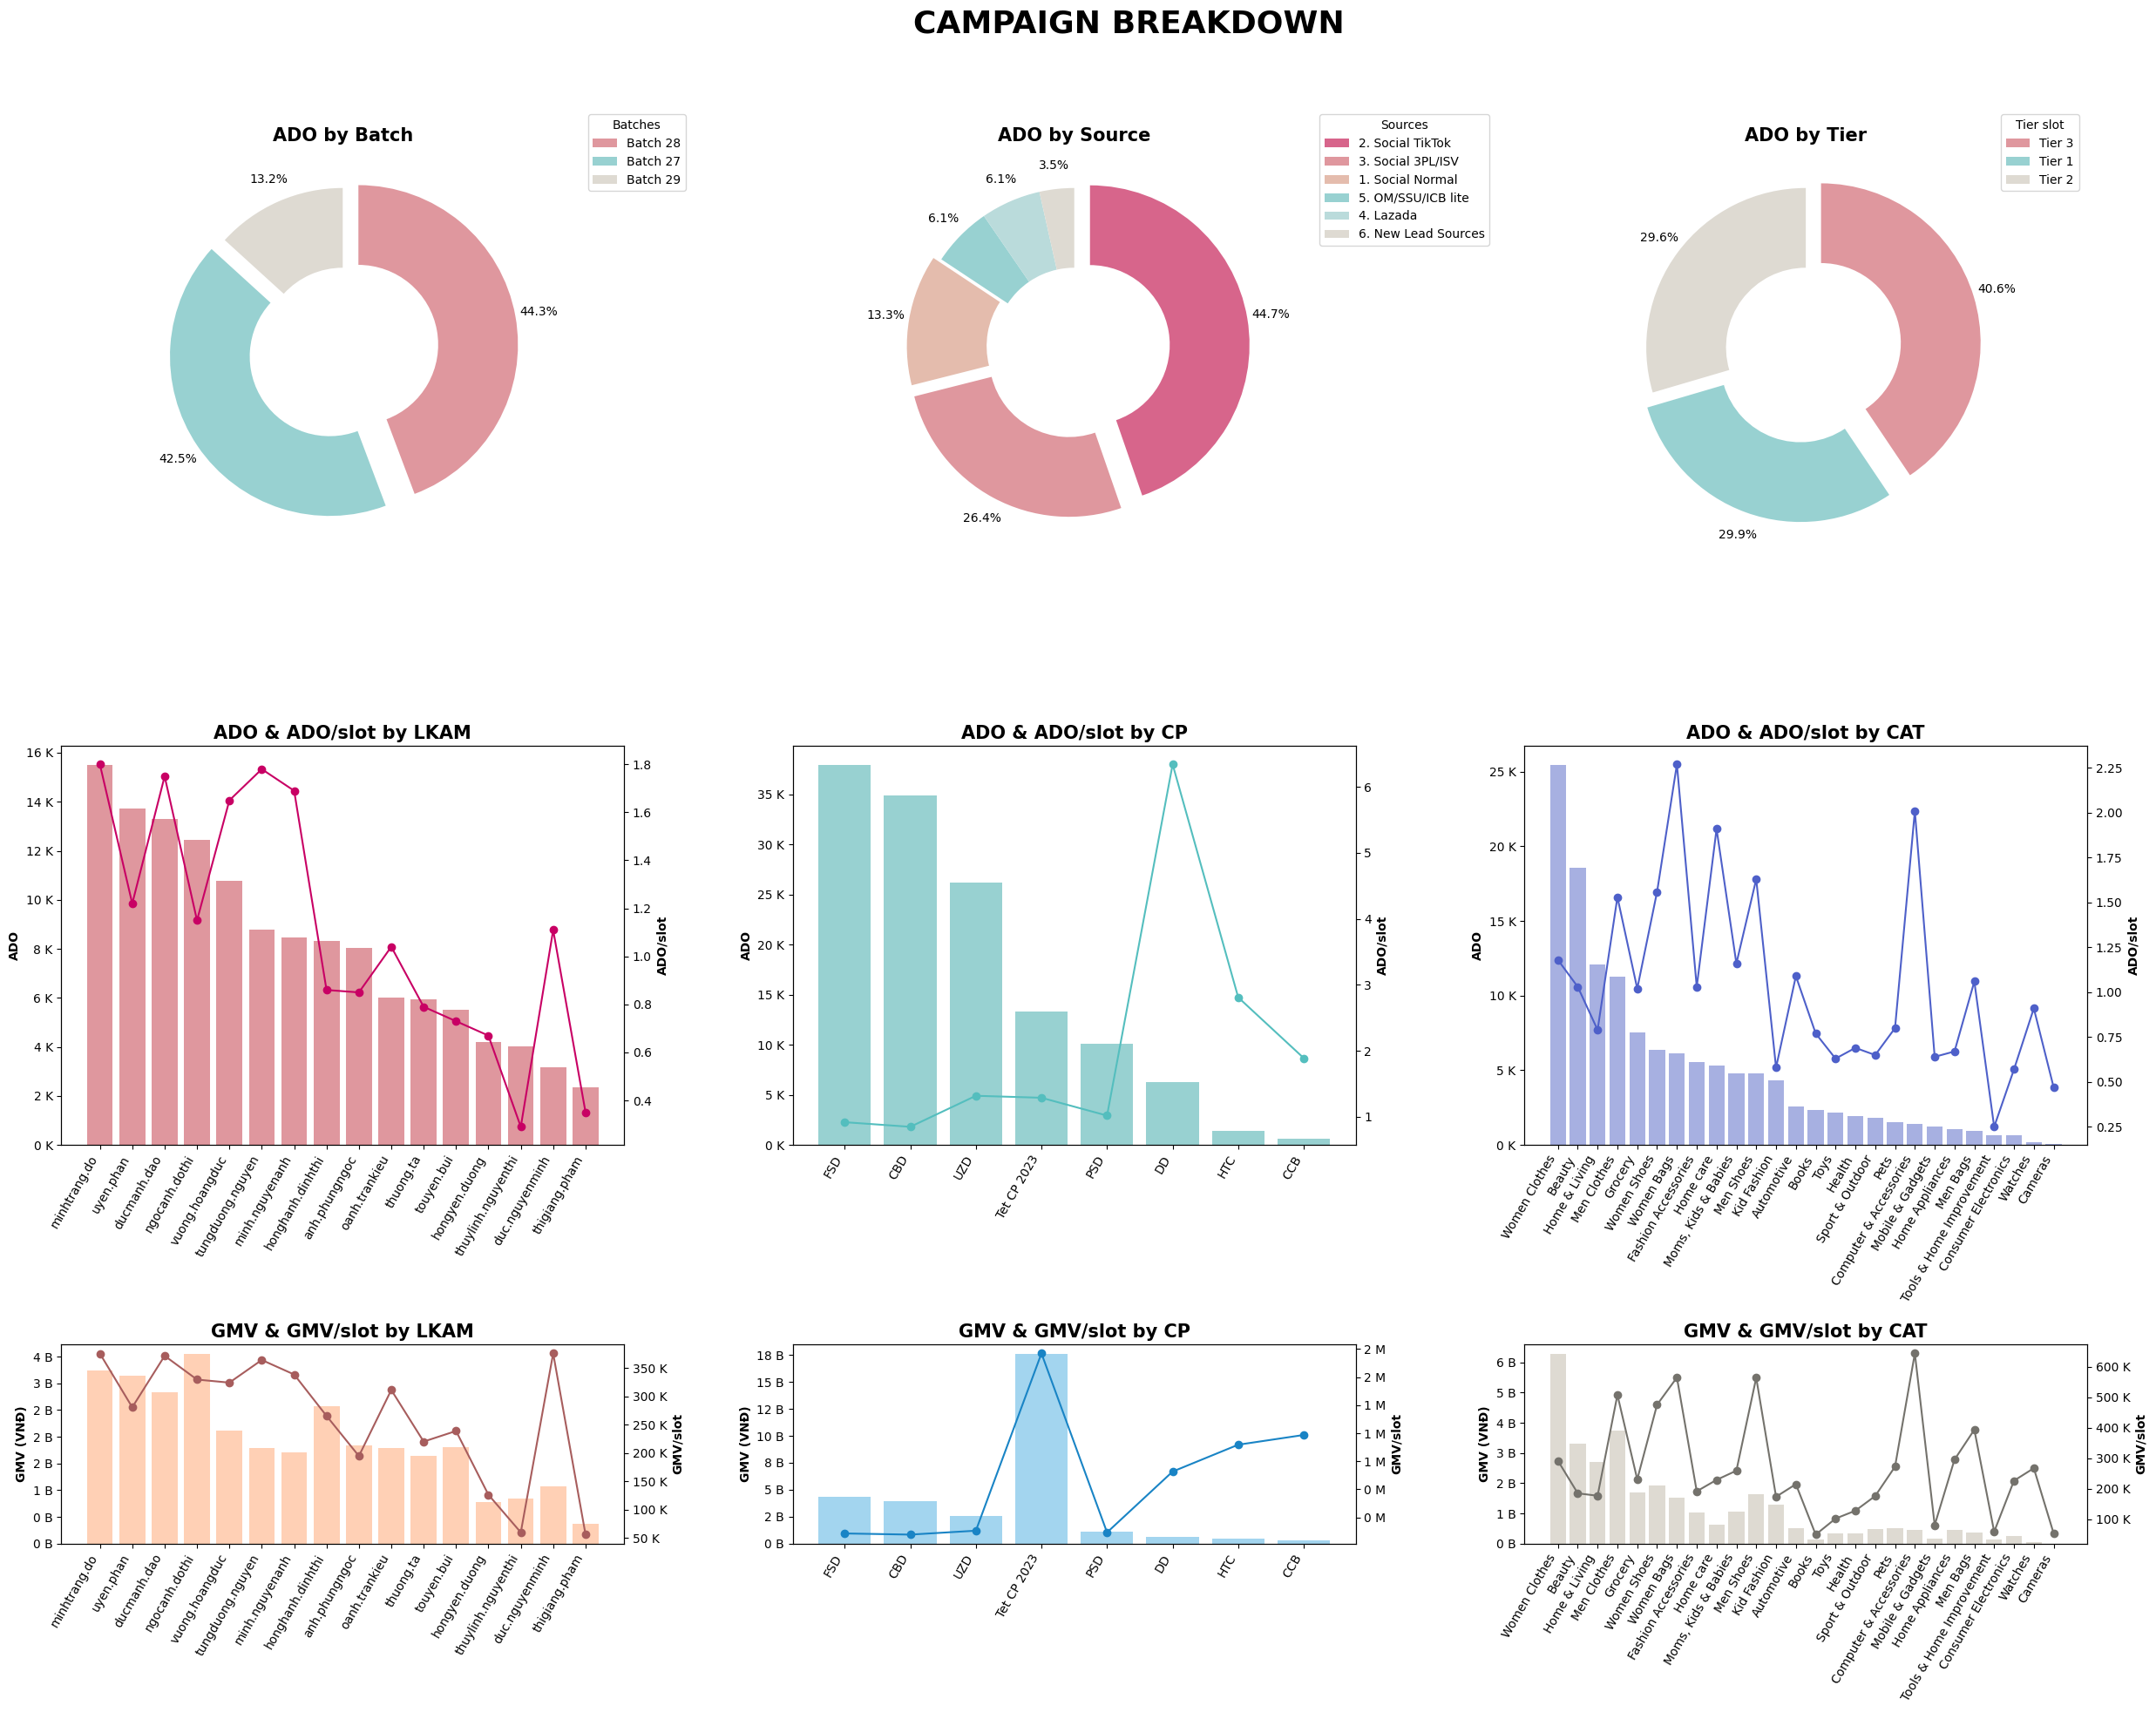

In [87]:
fig, ax = plt.subplots(3,3,figsize = (20,20),gridspec_kw={'height_ratios':[3,3,1.5]})

    #CHART 1: ADO by Batch
ax[0,0].pie(ADO_byBatch.values(), autopct = "%1.1f%%", counterclock = False, startangle = 90, pctdistance = 1.15, explode = (0.1, 0.1,0),wedgeprops ={'width': 0.5}, colors = foam_3)
ax[0,0].set_title("ADO by Batch",weight = "bold",size = 15)
ax[0,0].legend(ADO_byBatch.keys(),loc = "best", bbox_to_anchor=(1.1,1.1), title = "Batches")

    #CHART 2: ADO by Source
ax[0,1].pie(ADO_bySource.values(), autopct = "%1.1f%%", counterclock = False, startangle = 90, pctdistance = 1.15, explode = (0.1,0.07,0.05,0,0,0),wedgeprops ={'width': 0.5}, colors = foam)
ax[0,1].set_title("ADO by Source",weight = "bold",size = 15)
ax[0,1].legend(ADO_bySource.keys(),loc = "best", bbox_to_anchor=(1.1,1.1), title = "Sources")

    #CHART 3: ADO by Source
ax[0,2].pie(ADO_byTier.values(), autopct = "%1.1f%%", counterclock = False, startangle = 90, pctdistance = 1.15, explode = (0.1, 0.1,0),wedgeprops ={'width': 0.5}, colors = foam_3)
ax[0,2].set_title("ADO by Tier",weight = "bold",size = 15)
ax[0,2].legend(ADO_byTier.keys(),loc = "best", bbox_to_anchor=(1.2,1.1), title = "Tier slot")

###############################################

    #CHART 4: ADO-ADO/slot by LKAM
ax[1,0].bar(df_ADO_GMV_byLKAM["LKAM"],df_ADO_GMV_byLKAM["ADO"],color = "#df979e")
ax[1,0].set_title("ADO & ADO/slot by LKAM",weight = "bold",size = 15)

ax[1,0].set_xticks(df_ADO_GMV_byLKAM["LKAM"]) #This will fix below warning (UserWarning:FixedFormatter should only be used together with FixedLocator)
ax[1,0].set_xticklabels(df_ADO_GMV_byLKAM["LKAM"],rotation = 60, ha = "right")

ax[1,0].set_ylabel("ADO",fontweight = "bold")
ax[1,0].yaxis.set_major_formatter(formatter_thousands)
        #plot 2nd axis
ax2 = ax[1,0].twinx()
ax2.plot(df_ADO_GMV_byLKAM["LKAM"],df_ADO_GMV_byLKAM["ADO/slot"],color = "#c80064",marker='o')
ax2.set_ylabel("ADO/slot",fontweight = "bold")

    #CHART 5: ADO by CP
ax[1,1].bar(df_ADO_GMV_byCP["Campaign name"],df_ADO_GMV_byCP["ADO"],color = "#98d1d1")
ax[1,1].set_title("ADO & ADO/slot by CP",weight = "bold",size = 15)

ax[1,1].set_xticks(df_ADO_GMV_byCP["Campaign name"]) #This will fix below warning (UserWarning:FixedFormatter should only be used together with FixedLocator)
ax[1,1].set_xticklabels(df_ADO_GMV_byCP["Campaign name"],rotation = 60, ha = "right")

ax[1,1].set_ylabel("ADO",fontweight = "bold")
ax[1,1].yaxis.set_major_formatter(formatter_thousands)
        #plot 2nd axis
ax2 = ax[1,1].twinx()
ax2.plot(df_ADO_GMV_byCP["Campaign name"],df_ADO_GMV_byCP["ADO/slot"],color = "#54bebe",marker='o')
ax2.set_ylabel("ADO/slot",fontweight = "bold")

    #CHART 6: ADO by CAT
ax[1,2].bar(df_ADO_GMV_byCAT["CAT"],df_ADO_GMV_byCAT["ADO"],color = "#a7b0e1")
ax[1,2].set_title("ADO & ADO/slot by CAT",weight = "bold",size = 15)

ax[1,2].set_xticks(df_ADO_GMV_byCAT["CAT"]) #This will fix below warning (UserWarning:FixedFormatter should only be used together with FixedLocator)
ax[1,2].set_xticklabels(df_ADO_GMV_byCAT["CAT"],rotation = 60, ha = "right") #UserWarning:FixedFormatter should only be used together with FixedLocator

ax[1,2].set_ylabel("ADO",fontweight = "bold")
ax[1,2].yaxis.set_major_formatter(formatter_thousands)
        #plot 2nd axis
ax2 = ax[1,2].twinx()
ax2.plot(df_ADO_GMV_byCAT["CAT"],df_ADO_GMV_byCAT["ADO/slot"],color = "#4e60c9",marker='o')
ax2.set_ylabel("ADO/slot",fontweight = "bold")

###############################################


    #CHART 7: GMV-GMV/slot by LKAM
ax[2,0].bar(df_ADO_GMV_byLKAM["LKAM"],df_ADO_GMV_byLKAM["GMV"],color = "#ffd0b5")
ax[2,0].set_title("GMV & GMV/slot by LKAM",weight = "bold",size = 15)

ax[2,0].set_xticks(df_ADO_GMV_byLKAM["LKAM"]) #This will fix below warning (UserWarning:FixedFormatter should only be used together with FixedLocator)
ax[2,0].set_xticklabels(df_ADO_GMV_byLKAM["LKAM"],rotation = 60, ha = "right")

ax[2,0].set_ylabel("GMV (VNĐ)",fontweight = "bold")
ax[2,0].yaxis.set_major_formatter(formatter_billions)
        #plot 2nd axis
ax2 = ax[2,0].twinx()
ax2.plot(df_ADO_GMV_byLKAM["LKAM"],df_ADO_GMV_byLKAM["GMV/slot"],color = "#A75D5D",marker='o')
ax2.set_ylabel("GMV/slot",fontweight = "bold")
ax2.yaxis.set_major_formatter(formatter_thousands)


    #CHART 8: GMV-GMV/slot by CP
ax[2,1].bar(df_ADO_GMV_byCP["Campaign name"],df_ADO_GMV_byCP["GMV"],color = "#a3d5ef")
ax[2,1].set_title("GMV & GMV/slot by CP",weight = "bold",size = 15)

ax[2,1].set_xticks(df_ADO_GMV_byCP["Campaign name"]) #This will fix below warning (UserWarning:FixedFormatter should only be used together with FixedLocator)
ax[2,1].set_xticklabels(df_ADO_GMV_byCP["Campaign name"],rotation = 60, ha = "right")

ax[2,1].set_ylabel("GMV (VNĐ)",fontweight = "bold")
ax[2,1].yaxis.set_major_formatter(formatter_billions)
        #plot 2nd axis
ax2 = ax[2,1].twinx()
ax2.plot(df_ADO_GMV_byCP["Campaign name"],df_ADO_GMV_byCP["GMV/slot"],color = "#1984c5",marker='o')
ax2.set_ylabel("GMV/slot",fontweight = "bold")
ax2.yaxis.set_major_formatter(formatter_millions)


    #CHART 9: GMV-GMV/slot by CAT
ax[2,2].bar(df_ADO_GMV_byCAT["CAT"],df_ADO_GMV_byCAT["GMV"],color = "#dedad2")
ax[2,2].set_title("GMV & GMV/slot by CAT",weight = "bold",size = 15)

ax[2,2].set_xticks(df_ADO_GMV_byCAT["CAT"]) #This will fix below warning (UserWarning:FixedFormatter should only be used together with FixedLocator)
ax[2,2].set_xticklabels(df_ADO_GMV_byCAT["CAT"],rotation = 60, ha = "right")

ax[2,2].set_ylabel("GMV (VNĐ)",fontweight = "bold")
ax[2,2].yaxis.set_major_formatter(formatter_billions)
        #plot 2nd axis
ax2 = ax[2,2].twinx()
ax2.plot(df_ADO_GMV_byCAT["CAT"],df_ADO_GMV_byCAT["GMV/slot"],color = "#74726c",marker='o')
ax2.set_ylabel("GMV/slot",fontweight = "bold")
ax2.yaxis.set_major_formatter(formatter_thousands)


    #Set title for bigchart
fig.suptitle('CAMPAIGN BREAKDOWN', size = 26, fontweight = "bold", x = 0.65)
fig.tight_layout()

plt.subplots_adjust(right = 1.2, top = 0.9 , wspace = 0.3, hspace = 0.6)

plt.show()

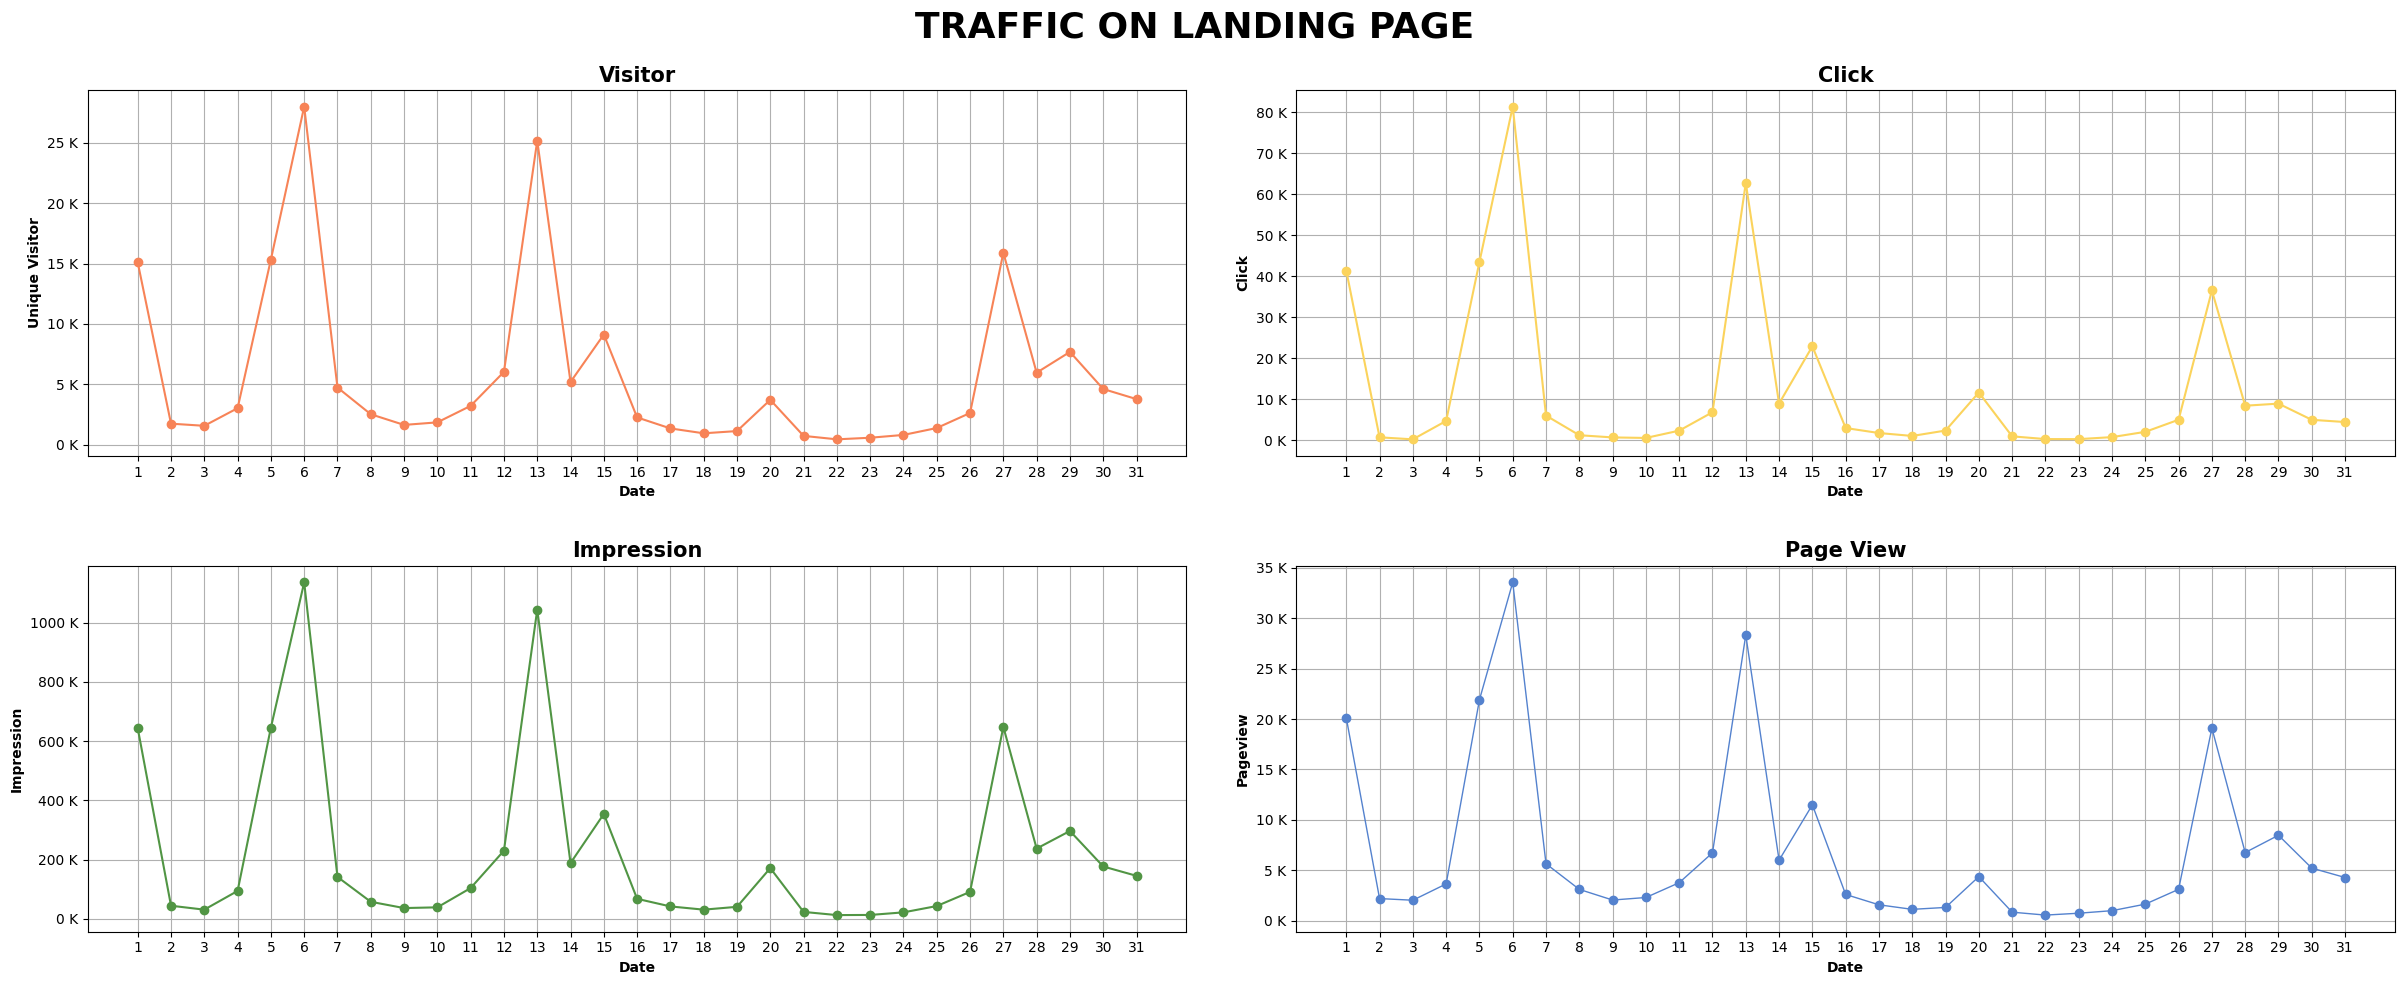

In [88]:
fig, ax = plt.subplots(2,2,figsize = (20,10),gridspec_kw={'height_ratios':[1,1]})

#set range
range = np.arange(1,len(df_Traffic_byDate["Date"])+1,1)

    #CHART 1: Traffic by Visitor
ax[0,0].plot(range,
             df_Traffic_byDate["Visitor"],
             color = "#f78357",
             marker='o')
ax[0,0].set_title("Visitor",size = 15,fontweight = "bold")
ax[0,0].set_ylabel("Unique Visitor",fontweight = "bold")
ax[0,0].set_xlabel("Date",fontweight = "bold")
ax[0,0].yaxis.set_major_formatter(formatter_thousands)
ax[0,0].locator_params(nbins=60, axis='x')
ax[0,0].set_xticks(range)
ax[0,0].grid()

    #CHART 2: Traffic by Click
ax[0,1].plot(range,
             df_Traffic_byDate["Click"],
             color = "#fbd35c",
             marker='o')
ax[0,1].set_title("Click",size = 15,fontweight = "bold")
ax[0,1].set_ylabel("Click",fontweight = "bold")
ax[0,1].set_xlabel("Date",fontweight = "bold")
ax[0,1].yaxis.set_major_formatter(formatter_thousands)
ax[0,1].locator_params(nbins=60, axis='x')
ax[0,1].set_xticks(range)
ax[0,1].grid()

    #CHART 3: Traffic by Impression
ax[1,0].plot(range,
             df_Traffic_byDate["Impression"],
             color = "#519544",
             marker='o')
ax[1,0].set_title("Impression",size = 15,fontweight = "bold")
ax[1,0].set_ylabel("Impression",fontweight = "bold")
ax[1,0].set_xlabel("Date",fontweight = "bold")
ax[1,0].yaxis.set_major_formatter(formatter_thousands)
ax[1,0].locator_params(nbins=60, axis='x')
ax[1,0].set_xticks(range)
ax[1,0].grid()

    #CHART 4: Traffic by Pageview
ax[1,1].plot(range,
             df_Traffic_byDate["Pageview"],
             color = "#5482ce",
             marker='o',
             linewidth=1.0)
ax[1,1].set_title("Page View",size = 15,fontweight = "bold")
ax[1,1].set_ylabel("Pageview",fontweight = "bold")
ax[1,1].set_xlabel("Date",fontweight = "bold")
ax[1,1].yaxis.set_major_formatter(formatter_thousands)
ax[1,1].set_xticks(range)
ax[1,1].grid()

    #Set title for bigchart
fig.suptitle('TRAFFIC ON LANDING PAGE', size = 26, fontweight = "bold", x = 0.6)
fig.tight_layout()

plt.subplots_adjust(right = 1.2, top = 0.9 , wspace = 0.1, hspace = 0.3)